import libraries

In [27]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data

In [55]:
#read the data
d = pd.read_csv("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
d.head() #check the data

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
#if any corrections, use this:
'''#corrections:
#correcting the index values
d.drop(["index"],axis = 1, inplace = True)


# Select all columns except "col_name"
cols = d.columns[d.columns != "oldpeak"]

# Convert the datatype of the selected columns to int64
d[cols] = d[cols].astype(pd.Int64Dtype())
'''

'#corrections:\n#correcting the index values\nd.drop(["index"],axis = 1, inplace = True)\n\n\n# Select all columns except "col_name"\ncols = d.columns[d.columns != "oldpeak"]\n\n# Convert the datatype of the selected columns to int64\nd[cols] = d[cols].astype(pd.Int64Dtype())\n'

In [57]:
d.drop(["index"],axis = 1, inplace = True) #drop the index column

Basic info of dataset

In [58]:
#gives first 5 rows of dataset
d.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
d.shape #gives the shape of the dataset

(299, 14)

In [60]:
#indo of every row
d.info()
#there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    int64  
 2   cp        299 non-null    int64  
 3   trtbps    299 non-null    int64  
 4   chol      299 non-null    int64  
 5   fbs       299 non-null    int64  
 6   restecg   299 non-null    int64  
 7   thalachh  299 non-null    int64  
 8   exng      299 non-null    int64  
 9   oldpeak   299 non-null    float64
 10  slp       299 non-null    int64  
 11  caa       299 non-null    int64  
 12  thall     299 non-null    int64  
 13  output    299 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.8 KB


In [61]:
#columns are
print(d.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [62]:
#important stats about the data
d.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,54.374582,9.063543,29.0,47.5,55.0,61.0,77.0
sex,299.0,0.685619,0.465047,0.0,0.0,1.0,1.0,1.0
cp,299.0,0.963211,1.033979,0.0,0.0,1.0,2.0,3.0
trtbps,299.0,131.053512,16.355647,94.0,120.0,130.0,140.0,170.0
chol,299.0,244.672241,47.003423,126.0,211.0,240.0,274.0,369.0
fbs,299.0,0.147157,0.354856,0.0,0.0,0.0,0.0,1.0
restecg,299.0,0.531773,0.525996,0.0,0.0,1.0,1.0,2.0
thalachh,299.0,149.481605,22.701200,84.0,133.5,152.0,166.0,202.0
exng,299.0,0.327759,0.470183,0.0,0.0,0.0,1.0,1.0
oldpeak,299.0,1.019398,1.100469,0.0,0.0,0.8,1.6,4.0


Check for Null values:

In [63]:
d.isnull().sum() #no null values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

So, no missing values in dataset.

Check for duplicate rows:

In [64]:
#gives the sum of any duplicate rows
d.duplicated().sum() #no duplicate rows
#d.drop_duplicates() #163 rowth was a duplicate of 162
#Hence, there are no duplicate rows.

0

Histogram for all features:

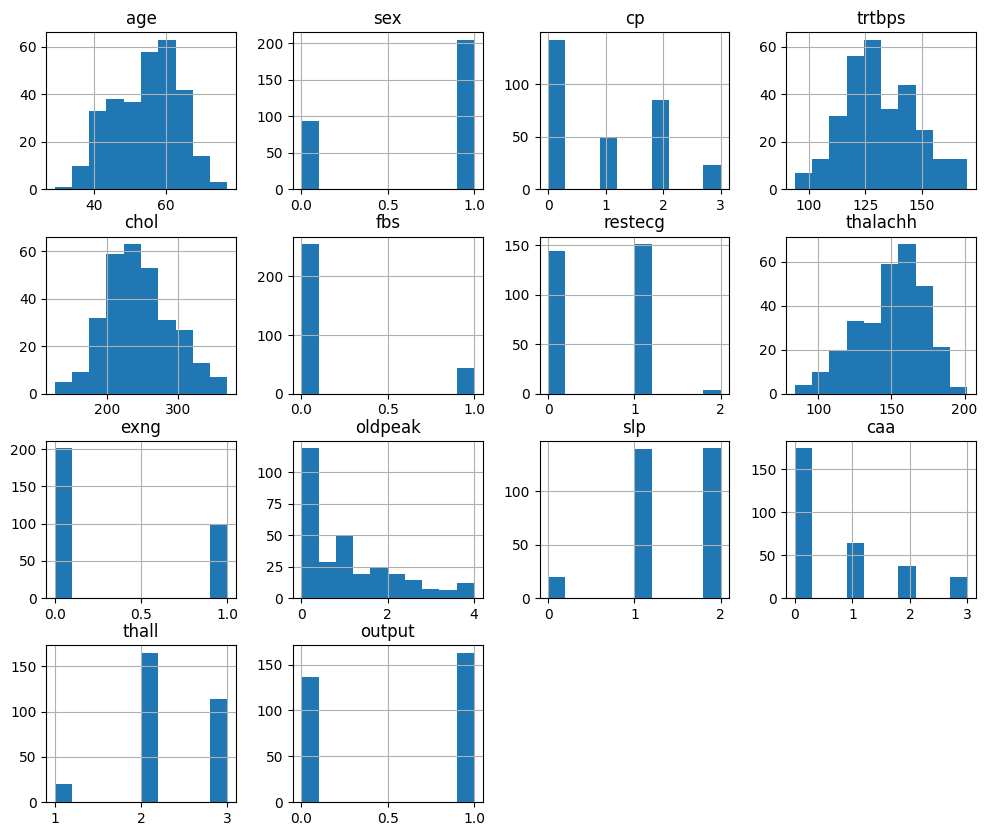

In [65]:
d.hist(figsize = (12,10)) #histogram of all the columns
plt.show() #show the histogram

Categorical and Continous Features are:

In [66]:
cont_f = ['age','trtbps', 'chol','thalachh','oldpeak'] #continuous features
cat_f = [ 'sex', 'cp',  'fbs', 'restecg', 'exng', 'slp',  'caa','thall'] #categorical features
Target = [ 'output' ] #target
print("Continous Features:\n",cont_f) 
print("\nCategorical Features:\n",cat_f)
print("\nTarget:\n",Target)

Continous Features:
 ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

Categorical Features:
 ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

Target:
 ['output']


Boxplot for discrete features:

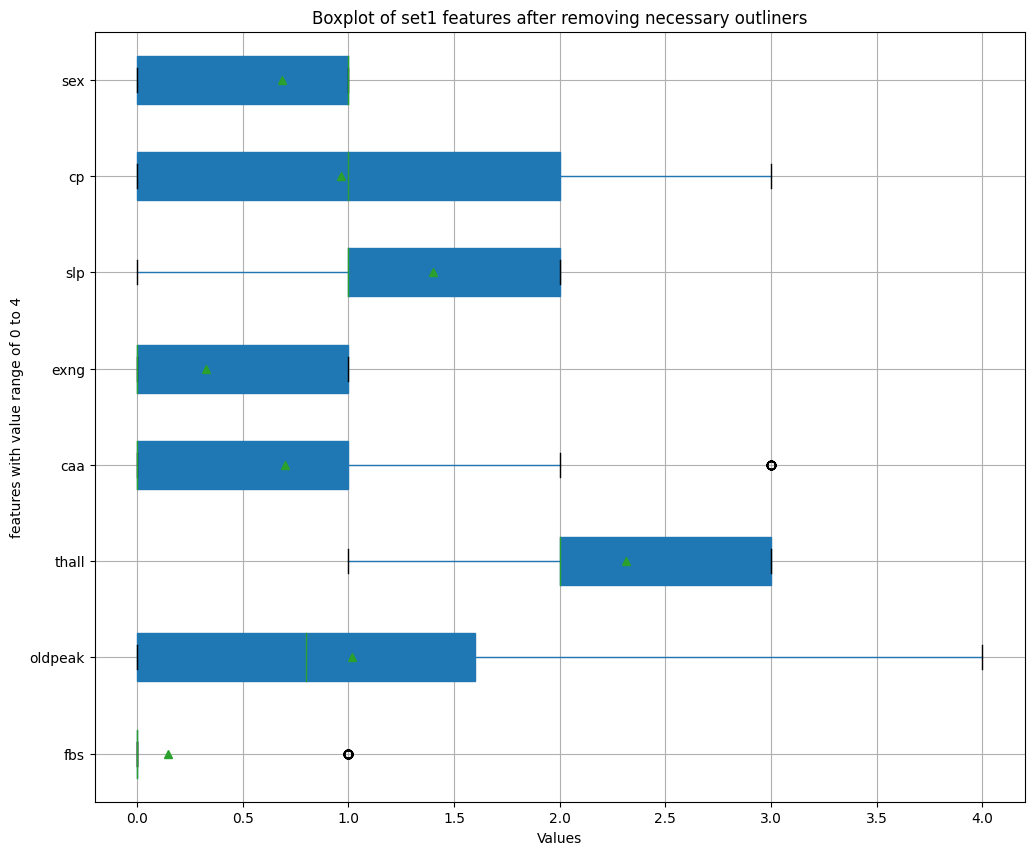

In [68]:
#plotting the discrete features
d_sub1_dis = pd.DataFrame([d.fbs, d.oldpeak, d.thall, d.caa, d.exng, d.slp, d.cp, d.sex]).T #subsetting the data
d_sub1_dis.boxplot(figsize =(12,10), patch_artist= True, vert = False, showmeans = True) #plotting the boxplot
plt.xlabel("Values") 
plt.ylabel("features with value range of 0 to 4")
plt.title("Boxplot of set1 features after removing necessary outliners")
plt.show()

boxplot for continous features:

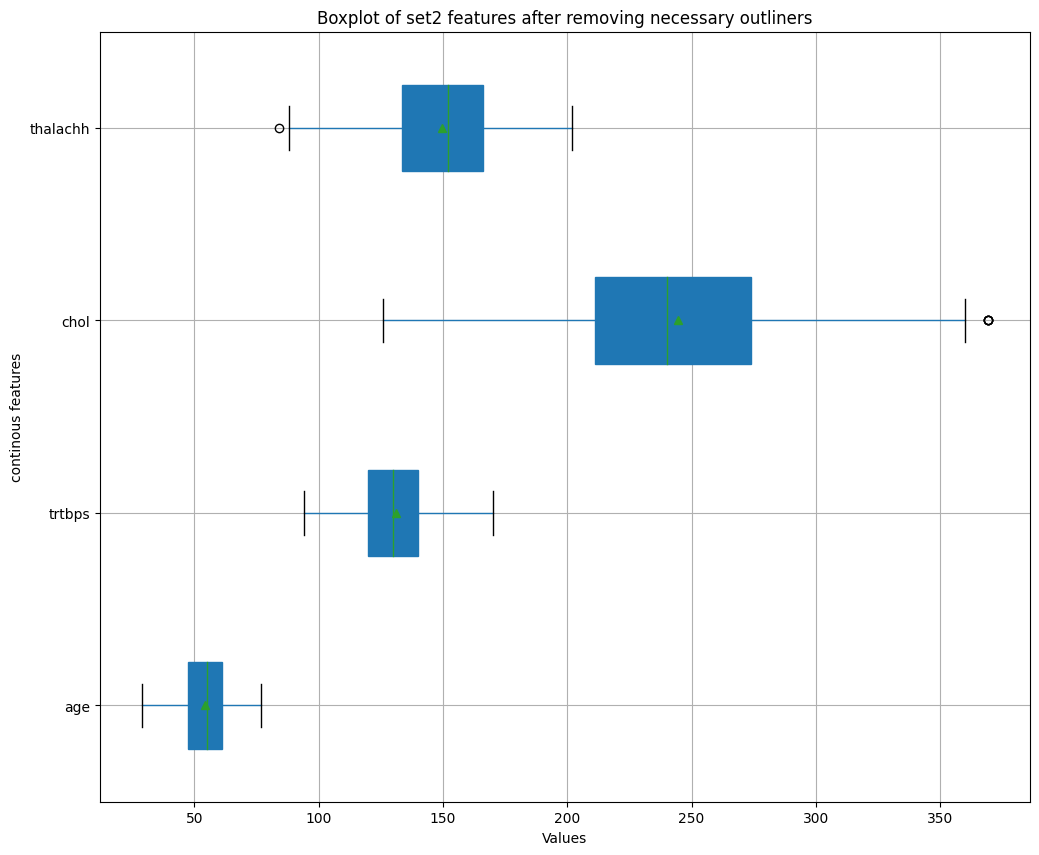

In [69]:
#plotting the continous features
d_sub2_cont = pd.DataFrame([d.age, d.trtbps, d.chol, d.thalachh]).T #subsetting the data
d_sub2_cont.boxplot(figsize =(12,10), patch_artist= True, vert = False, showmeans = True)
plt.xlabel("Values")
plt.ylabel("continous features")
plt.title("Boxplot of set2 features after removing necessary outliners")
plt.show()

OUTPUT(target) value count

output
1    163
0    136
dtype: int64


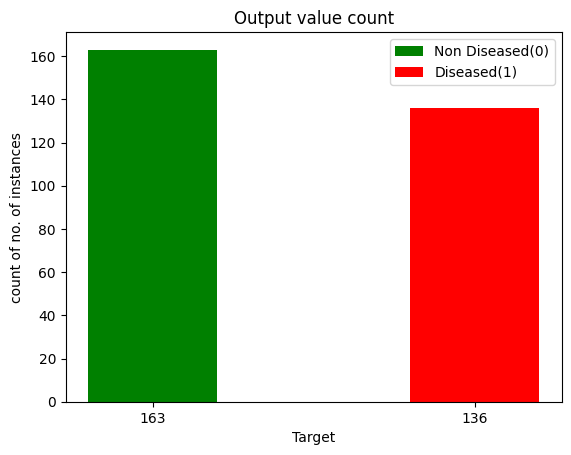

In [70]:
#plotting the target
op_count =d.value_counts("output") #count of each value in the target
print(op_count) 
op_count_plot = plt.bar([str(op_count[1.0]),str(op_count[0.0])],op_count, width = 0.4, color = ["g","r"], label = ["Non Diseased(0)","Diseased(1)"]) #plotting the bar graph
plt.xlabel("Target")
plt.ylabel("count of no. of instances")
plt.title("Output value count")
plt.legend(loc = "upper right") 
plt.show()

We see here that the class distribution is not well balanced! It is more towards Non Diseased. But we may keep it like that since it relatively well balanced!

Heat Map and correlation:

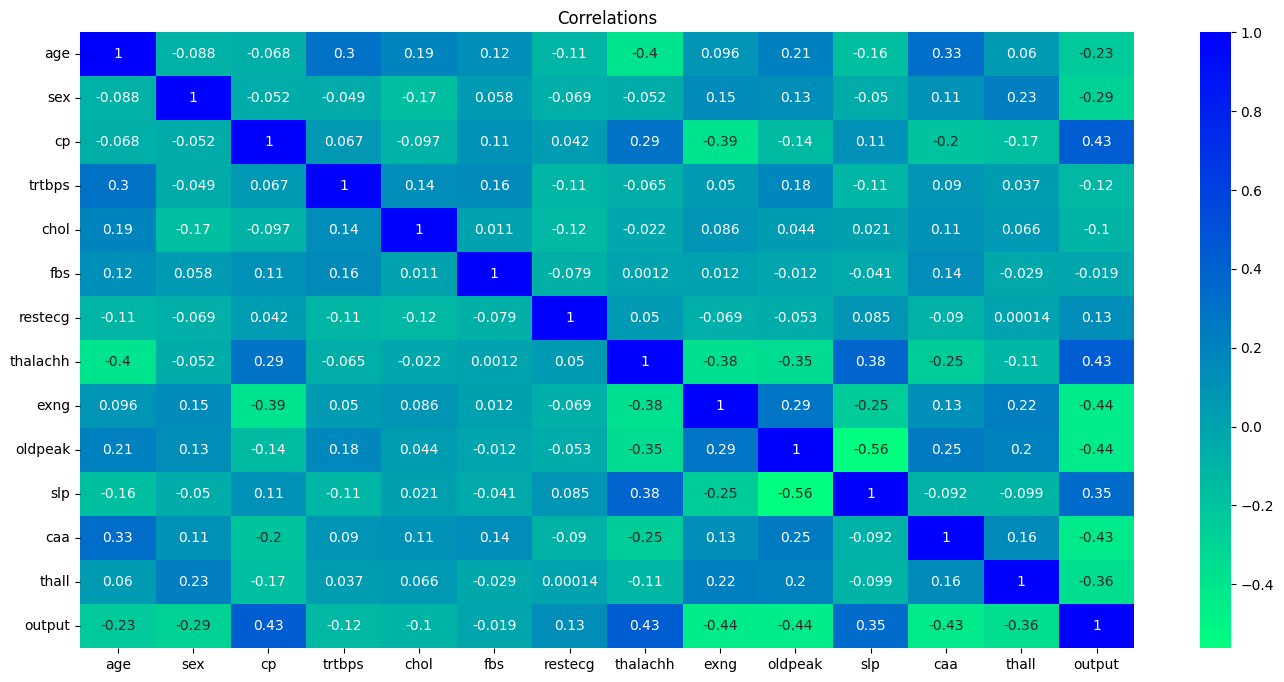

In [72]:
#plotting the correlation matrix
fig, ax = plt.subplots(figsize = (17,8)) #fig is one full figure. ax is the axes. here, we have only one axis.
d_heatmap = sns.heatmap(d.corr(), cmap = "winter_r", annot = True, ax = ax) #plotting the heatmap
plt.title("Correlations")
plt.show()

KDE:   (Inferences from the heat map are used for KDE plot)

Features: restecg, slp, cp, thalachh have +ve Correlations with output.

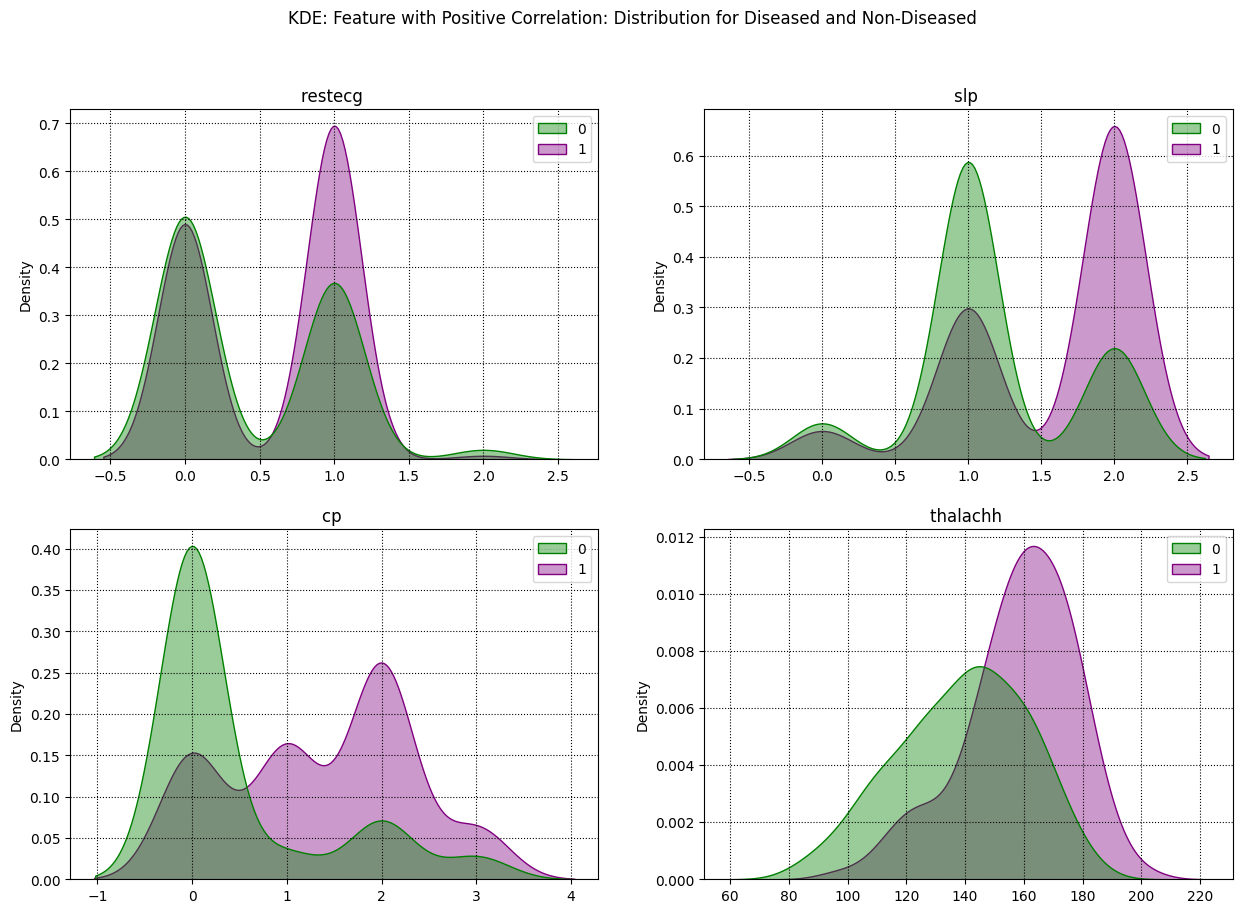

In [73]:
#plotting the KDE plots for the features with +ve correlation with the output
fig, axes = plt.subplots(2,2,figsize = (15,10)) #here, 2,2 = (row_n,col_n).
fig.suptitle("KDE: Feature with Positive Correlation: Distribution for Diseased and Non-Diseased") #title for whole figure

#distribution plots for all featues having a +ve correlations with the output:
 
sns.kdeplot(data = d, x = np.array(d['restecg']), hue = np.array(d["output"]), fill = True, palette = ['g','purple'], alpha = 0.4, ax = axes[0,0])  #fig 0,0
axes[0,0].set_title("restecg ")
axes[0,0].grid(linestyle = ":",color = "black") #grid lines

sns.kdeplot(data = d, x = np.array(d['slp']), hue = np.array(d["output"]), fill = True, palette = ['g','purple'], alpha = 0.4, ax = axes[0,1]) #fig 0,1
axes[0,1].set_title("slp ")
axes[0,1].grid(linestyle = ":",color = "black")

sns.kdeplot(data = d, x = np.array(d['cp']), hue = np.array(d["output"]), fill = True, palette = ['g','purple'], alpha = 0.4, ax = axes[1,0]) #fig 1,0
axes[1,0].set_title("cp ")
axes[1,0].grid(linestyle = ":",color = "black")

sns.kdeplot(data = d, x = np.array(d['thalachh']), hue = np.array(d["output"]), fill = True, palette = ['g','purple'], alpha = 0.4, ax = axes[1,1]) #fig 1,1
axes[1,1].set_title("thalachh ")
axes[1,1].grid(linestyle = ":",color = "black")

plt.show()

Features: age, sex, thall, caa, exng, oldpeak are -ve Correlations with output.

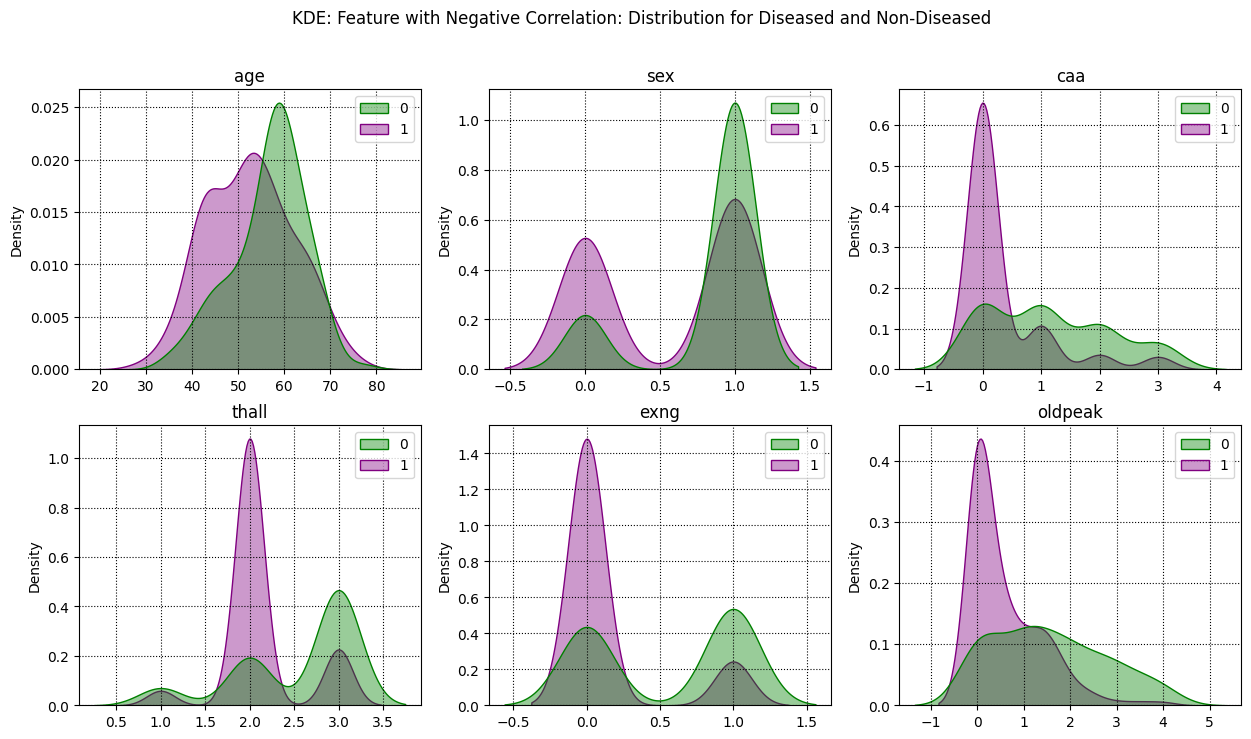

In [74]:
#plotting the KDE plots for the features with -ve correlation with the output
fig, axes = plt.subplots(2,3,figsize = (15,8)) #here, 2,2 = (row_n,col_n).
fig.suptitle("KDE: Feature with Negative Correlation: Distribution for Diseased and Non-Diseased") #title for whole figure

#distribution plots for all featues having a -ve correlations with the output:

#fig 0,0 
sns.kdeplot(data = d, x = np.array(d['age']), hue = np.array(d["output"]), fill = True, palette = ['g','purple'], alpha = 0.4, ax = axes[0,0]) #fig 0,0
axes[0,0].set_title("age")
axes[0,0].grid(linestyle = ":",color = "black")

#fig 0,1
sns.kdeplot(data = d, x = np.array(d['sex']), hue = np.array(d["output"]), fill = True, palette = ['g','purple'], alpha = 0.4, ax = axes[0,1]) #fig 0,1
axes[0,1].set_title("sex")
axes[0,1].grid(linestyle = ":",color = "black")

#fig 0,2
sns.kdeplot(data = d, x = np.array(d['caa']), hue = np.array(d["output"]), fill = True, palette = ['g','purple'], alpha = 0.4, ax = axes[0,2]) #fig 0,2
axes[0,2].set_title("caa")
axes[0,2].grid(linestyle = ":",color = "black")

#fig 1,0
sns.kdeplot(data = d, x = np.array(d['thall']), hue = np.array(d["output"]), fill = True, palette = ['g','purple'], alpha = 0.4, ax = axes[1,0]) #fig 1,0
axes[1,0].set_title("thall")
axes[1,0].grid(linestyle = ":",color = "black")

#fig 1,1
sns.kdeplot(data = d, x = np.array(d['exng']), hue = np.array(d["output"]), fill = True, palette = ['g','purple'], alpha = 0.4, ax = axes[1,1]) #fig 1,1
axes[1,1].set_title("exng")
axes[1,1].grid(linestyle = ":",color = "black")

#fig 1,2
sns.kdeplot(data = d, x = np.array(d['oldpeak']), hue = np.array(d["output"]), fill = True, palette = ['g','purple'], alpha = 0.4, ax = axes[1,2]) #fig 1,2
axes[1,2].set_title("oldpeak")
axes[1,2].grid(linestyle = ":",color = "black")

#show all the plots
plt.show()

other interesting KDE plots:

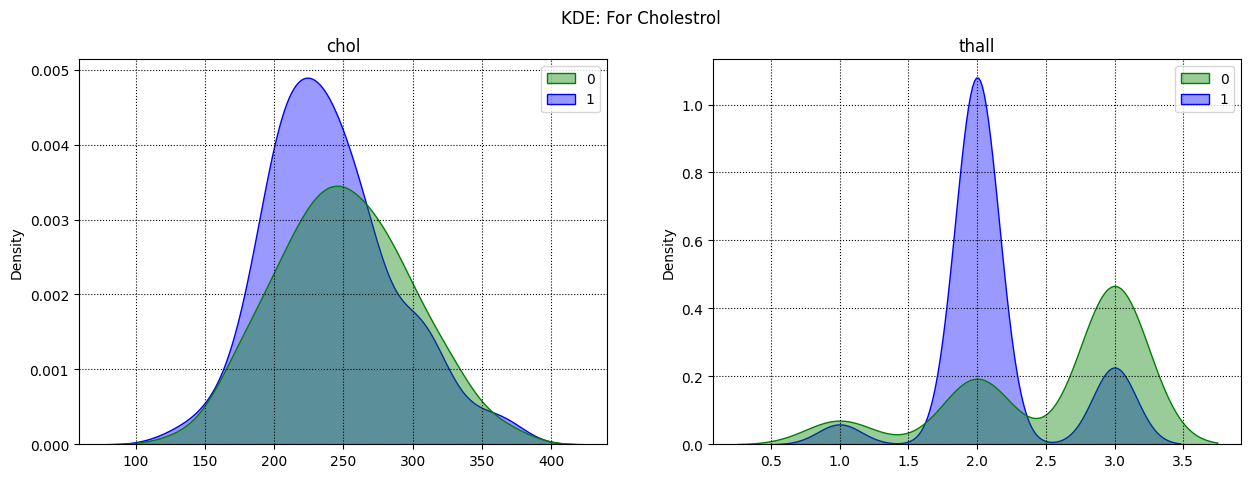

In [75]:
#plotting the KDE plots for some other interesting features
fig, axes = plt.subplots(1,2,figsize = (15,5)) #here, 2,2 = (row_n,col_n).
fig.suptitle("KDE: For Cholestrol") #title for whole figure

#fig 0
sns.kdeplot(data = d, x = np.array(d['chol']), hue = np.array(d["output"]), palette = ["g",'b'], fill = True, alpha = 0.4, ax = axes[0])
axes[0].set_title("chol")
axes[0].grid(linestyle = ":",color = "black")

#fig 1
sns.kdeplot(data = d, x = np.array(d['thall']), hue = np.array(d["output"]), palette = ["g","b"], fill = True, alpha = 0.4, ax = axes[1])
axes[1].set_title("thall")
axes[1].grid(linestyle = ":",color = "black")

people having heart attack are having chol values atmost between (200,250)

SCATTER PLOTS

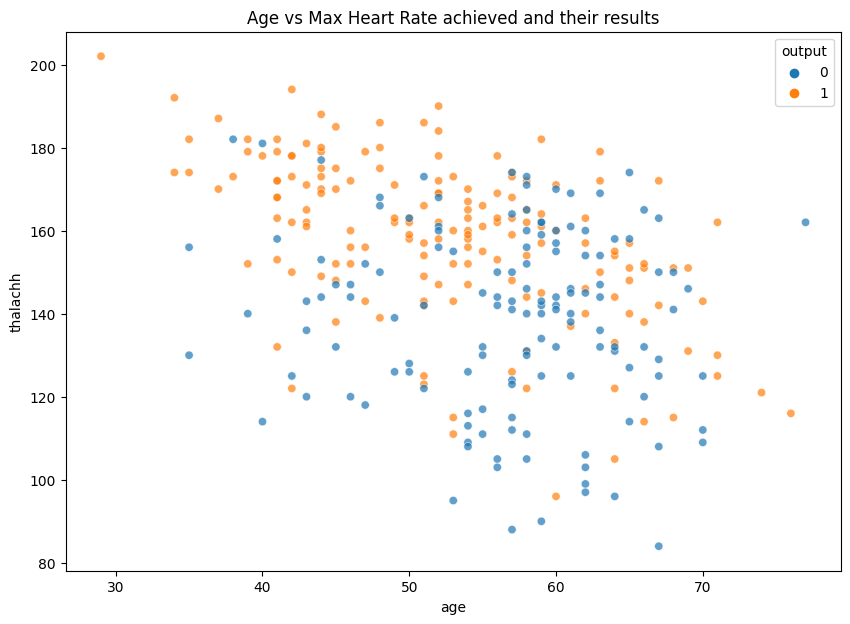

In [76]:
#plot the scatter plot for the age vs max heart rate achieved
fig, ax = plt.subplots(figsize = (10,7)) #subplot are used to plot multiple plots in one figure
#fig is the whole figure and ax is the axes of the figure
sns.scatterplot(data=d, y="thalachh", x="age", hue="output", alpha=0.7,  ax =ax) 
plt.title("Age vs Max Heart Rate achieved and their results")
plt.ylabel("thalachh")
plt.xlabel("age")
plt.show()

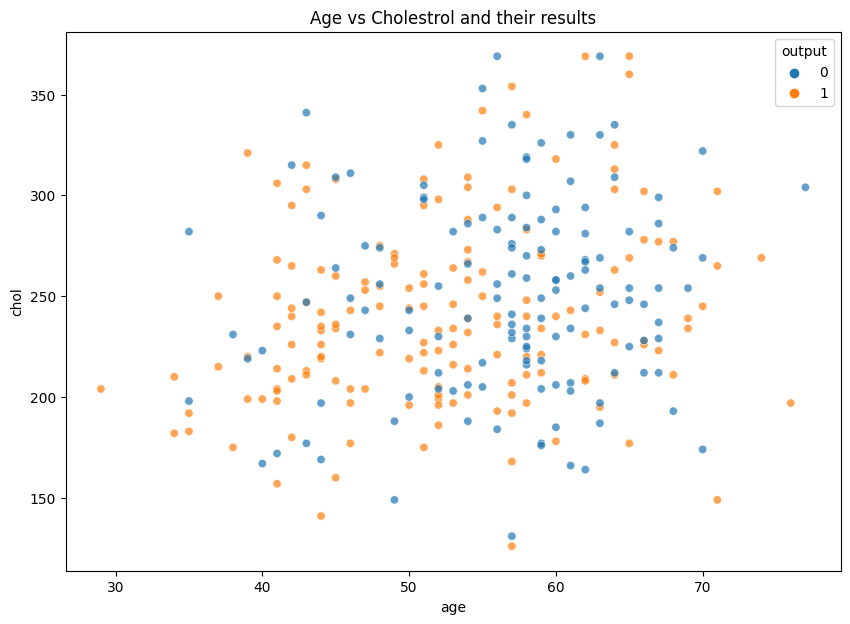

In [77]:
#plot the scatter plot for the age vs cholestrol
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(data=d, y="chol", x="age", hue="output", alpha=0.7,  ax =ax)
plt.title("Age vs Cholestrol and their results")
plt.ylabel("chol")
plt.xlabel("age")
plt.show()


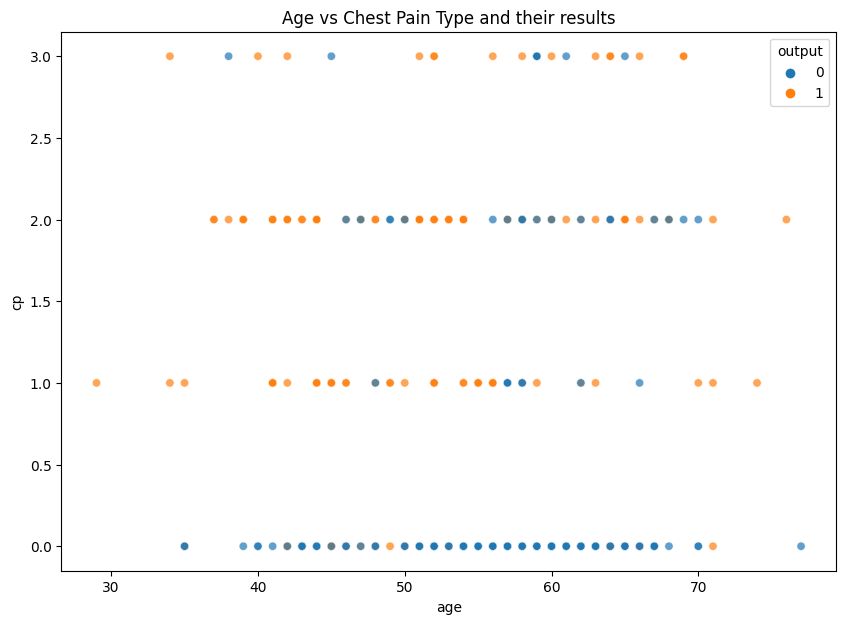

In [78]:
#plot the scatter plot for the age vs chest pain type
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(data=d, y="cp", x="age", hue="output", alpha=0.7,  ax =ax)
plt.title("Age vs Chest Pain Type and their results")
plt.ylabel("cp")
plt.xlabel("age")
plt.show()

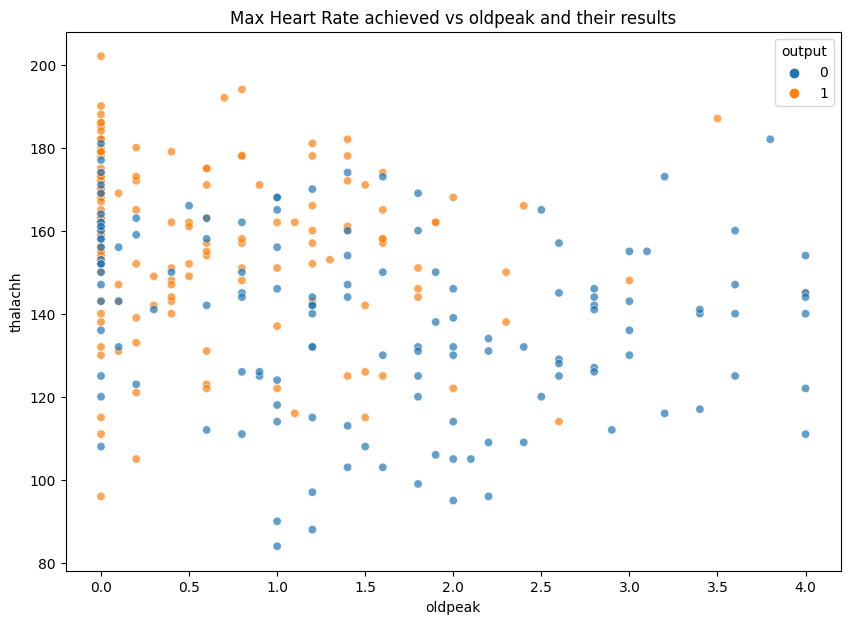

In [79]:
#plot the scatter plot for the max heart rate achieved vs oldpeak
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(data=d, y="thalachh", x="oldpeak", hue="output", alpha=0.7,  ax =ax)
plt.title("Max Heart Rate achieved vs oldpeak and their results")
plt.ylabel("thalachh")
plt.xlabel("oldpeak")
plt.show()

end of EDA